## Why fast-text?

FastText (which is essentially an extension of word2vec model), treats each word as composed of character ngrams. So the vector for a word is made of the sum of this character n grams.

N-gram feature is the most significant improvement in FastText, it’s designed to solve OOV(Out-of-Vocabulary) issue.

For example, the word `aquarium` can be split into `<aq/aqu/qua/uar/ari/riu/ium/um>`, `<` and `>` means SOW and EOW.

As Word Embedder encounter word `aquarius`, it might not recognize it, but it can guess by the share part in `aquarium` and `aquarius`, to embed aquarius near aquarium

## Pretrained fast-text

You can download Malaya pretrained without need to import malaya.

#### word2vec from wikipedia

[size-1024](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v16/fasttext/fasttext-wiki-1024.p)

You will get a pickle file, contains `['nce_weights', 'dictionary']`.

To load that pickle file,
```python
import pickle
with open('file.p', 'rb') as fopen:
    word2vec = pickle.load(fopen)
```

But If you don't know what to do with malaya fast-text, Malaya provided some useful functions for you!

In [1]:
%%time
import malaya

CPU times: user 12 s, sys: 1.32 s, total: 13.4 s
Wall time: 16.6 s


## Load malaya wikipedia fast-text

In [2]:
wiki, ngrams = malaya.fast_text.load_wiki()

## Load fast-text interface

**But problem with fast-text, dictionary only have ngrams words, we need to provide actual words to compare semantic similarity**

In [3]:
fast_text_nce = malaya.fast_text.fast_text(wiki['nce_weights'],wiki['dictionary'],ngrams)
fast_text_embed = malaya.fast_text.fast_text(wiki['embed_weights'],wiki['dictionary'],ngrams)

## Check top-k similar semantics based on a word

In [4]:
fast_text_nce.n_closest('najib',['najib razak','mahathir','1mdb','rosmah',
                             'kerajaan','penjara','cerdik','kipas','husein'])

[['najib razak', 0.9890886545181274],
 ['husein', 0.9856827259063721],
 ['mahathir', 0.9842776656150818],
 ['kipas', 0.9831240177154541],
 ['rosmah', 0.9758304357528687]]

In [5]:
fast_text_embed.n_closest('najib',['najib razak','mahathir','1mdb','rosmah',
                             'kerajaan','penjara','cerdik','kipas','husein'])

[['najib razak', 0.6421577334403992],
 ['mahathir', 0.12914645671844482],
 ['1mdb', 0.0642591118812561],
 ['rosmah', 0.04841345548629761],
 ['kerajaan', 0.03990912437438965]]

Based on the results, `embed_weights` learnt better than `nce_weights`. It is really depends during training session.

In [6]:
fast_text_embed.n_closest('mkn',['makan','mukun','makin','gejala','mahathir'])

[['mukun', 0.4251323938369751],
 ['makan', 0.3479733467102051],
 ['makin', 0.33818352222442627],
 ['mahathir', 0.24181222915649414],
 ['gejala', -0.0475466251373291]]

In [7]:
fast_text_embed.n_closest('mkn',['makan','mukun','makin','gejala','mahathir'],return_similarity = False)

['mukun', 'makan', 'makin', 'mahathir', 'gejala']

## Calculate vb - va + vc

In [8]:
fast_text_embed.analogy('makan','kfc','mikin',
                        ['makan','mukun','makin','gejala','mahathir'])

['mikin']

## Fast-text calculator

You can put any equation you wanted.

In [9]:
fast_text_embed.calculator('anwar + amerika + mahathir',
                           ['makan','mukun','makin','gejala','mahathir'],
                           return_similarity = False)

['mahathir', 'makan', 'makin', 'gejala', 'mukun']

In [18]:
fast_text_embed.calculator('(anwar + amerika) / mahathir',
                           ['makan','mukun','makin','gejala','mahathir'],
                           return_similarity = True)

[['makan', 0.11451129709969454],
 ['gejala', 0.11409430208988958],
 ['mahathir', 0.070956003373157],
 ['makin', 0.00728455196402511],
 ['mukun', -0.012139292144108138]]

## Visualize scatter-plot

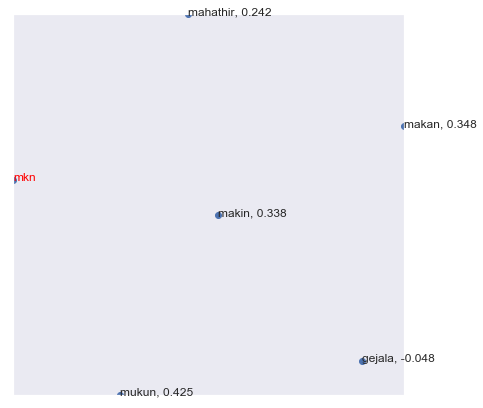

In [17]:
result = fast_text_embed.n_closest('mkn',['makan','mukun','makin','gejala','mahathir'])
fast_text_embed.scatter_plot(result, centre = 'mkn', notebook_mode = True)

## Visualize tree-plot

<Figure size 504x504 with 0 Axes>

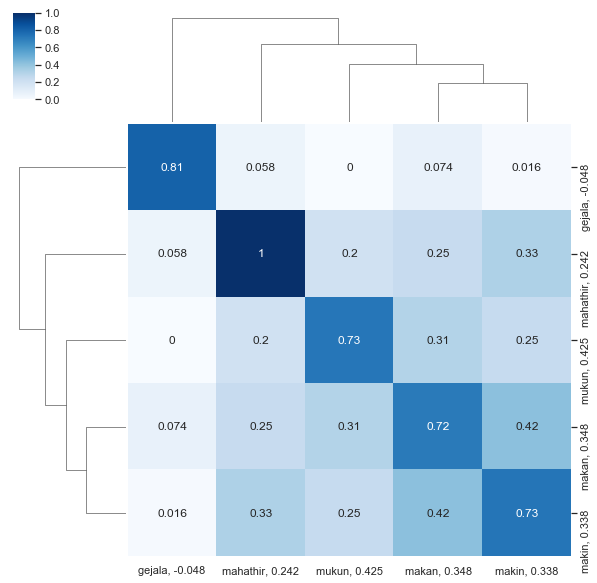

In [19]:
fast_text_embed.tree_plot(result, notebook_mode = True)

## Train on custom corpus

In [12]:
isu_kerajaan = ['Institusi raja khususnya Yang di-Pertuan Agong adalah kedaulatan negara dengan kedudukan dan peranannya termaktub dalam Perlembagaan Persekutuan yang perlu disokong dan didukung oleh kerajaan serta rakyat.',
               'Pensyarah Kulliyah Undang-Undang Ahmad Ibrahim, Universiti Islam Antarabangsa Malaysia (UIAM) Prof Madya Dr Shamrahayu Ab Aziz berkata perubahan kerajaan, susulan kemenangan Pakatan Harapan pada Pilihan Raya Umum Ke-14 pada Mei lepas, tidak memberi kesan dari segi peranan, fungsi dan kedudukan Yang di-Pertuan Agong.',
               'Peralihan kerajaan itu menyaksikan Sultan Muhammad V mencatat sejarah tersendiri dengan menjadi Yang di-Pertuan Agong Malaysia yang pertama memerintah dalam era dua kerajaan berbeza.',
               'Semasa dilantik sebagai Yang di-Pertuan Agong Ke-15 pada 13 Dis 2016, kerajaan ketika itu diterajui oleh Barisan Nasional dan pada 10 Mei lepas, kepimpinan negara diambil alih oleh Pakatan Harapan yang memenangi Pilihan Raya Umum Ke-14.',
               'Ketika merasmikan Istiadat Pembukaan Penggal Pertama, Parlimen ke-14 pada 17 Julai lepas, Seri Paduka bertitah mengalu-alukan pendekatan kerajaan Pakatan Harapan dalam menegakkan ketelusan terutamanya dengan mendedahkan kedudukan kewangan negara yang sebenar serta mengkaji semula perbelanjaan, kos projek dan mengurus kewangan secara berhemat bagi menangani kos sara hidup.',
               'Pada Jun lepas, Sultan Muhammad V memperkenankan supaya peruntukan gaji dan emolumen Yang di-Pertuan Agong dikurangkan sebanyak 10 peratus sepanjang pemerintahan sehingga 2021 berikutan keprihatinan Seri Paduka terhadap tahap hutang dan keadaan ekonomi negara.',
               'Seri Paduka turut menitahkan supaya Majlis Rumah Terbuka Aidilfitri tahun ini tidak diadakan di Istana Negara dengan peruntukan majlis itu digunakan bagi membantu golongan yang kurang bernasib baik.']

In [13]:
embed_weights, nce_weights, dictionary, ngrams = malaya.fast_text.train(isu_kerajaan, ngrams= (3,4))

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


train minibatch loop:  25%|██▌       | 2/8 [00:00<00:00, 18.50it/s, cost=29.6]

model built, vocab size 162, document length 239


test minibatch loop: 100%|██████████| 1/1 [00:00<00:00, 99.80it/s, cost=13.7]


In [24]:
fast_text_embed = malaya.fast_text.fast_text(nce_weights,dictionary,ngrams)

In [25]:
word = 'paduka'
print(fast_text_embed.n_closest(word, ['raja','agong','universiti','mahathir',
                                        'najib','husein','malaysia','pertama','sultan'],
                                 num_closest=8, metric='cosine'))

[['pertama', 0.9139029383659363], ['raja', 0.8856638669967651], ['sultan', 0.8645539283752441], ['malaysia', 0.7939320206642151], ['mahathir', 0.7685380578041077], ['universiti', 0.7584933638572693], ['husein', 0.7584933042526245], ['najib', 0.7584932446479797]]
